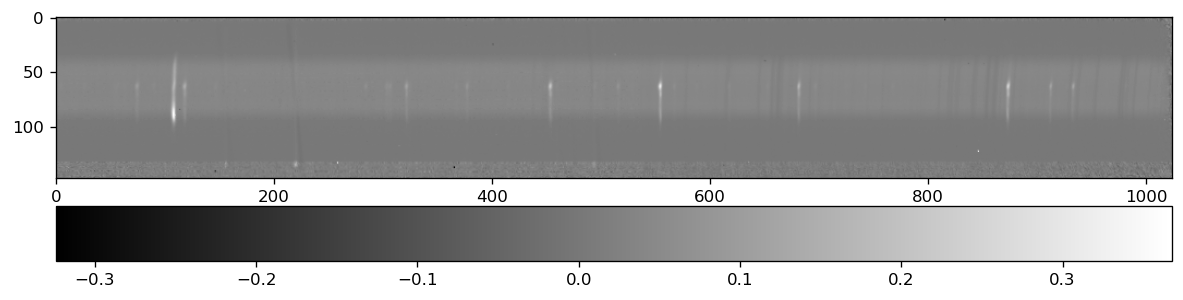

In [315]:
# import packages
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
from lmfit import Model

# path joining version for other paths
notebook_path = os.path.abspath('h3p.ipynb')
filepath = os.path.join(os.path.dirname(notebook_path), '02jun17/spec/order36/')

# count number of fits files in folder
filesize = len([name for name in os.listdir(filepath) if os.path.isfile(os.path.join(filepath, name))])

# load fits data
nirspec7_data = []
for i in range(filesize):
    n = i + 22 # fits index starts from 22
    if n < 100:
        hdu_data = fits.getdata(filepath + 'jun02s00' + '{}_order36.fits'.format(n), ext=0)
        nirspec7_data.append(hdu_data)
    elif n >= 100 and n < 112: # fits index ends at 111
        hdu_data = fits.getdata(filepath + 'jun02s0' + '{}_order36.fits'.format(n), ext=0)
        nirspec7_data.append(hdu_data)
    elif n >= 112:
        break
nirspec7_data_array = np.array(nirspec7_data)

# sky 51, 59; object 52 to 58 and the rest
data51 = nirspec7_data_array[51-22] # sky
data59 = nirspec7_data_array[59-22] # sky

# obtain average flat field and average flat lamp off
average_flat_field = np.mean((nirspec7_data_array[32-22], 
                              nirspec7_data_array[33-22], 
                              nirspec7_data_array[34-22], 
                              nirspec7_data_array[35-22], 
                              nirspec7_data_array[36-22], 
                              nirspec7_data_array[37-22], 
                              nirspec7_data_array[38-22], 
                              nirspec7_data_array[39-22], 
                              nirspec7_data_array[40-22], 
                              nirspec7_data_array[41-22],), axis=0)

average_flat_lamp_off = np.mean((nirspec7_data_array[22-22], 
                                 nirspec7_data_array[23-22], 
                                 nirspec7_data_array[24-22],
                                 nirspec7_data_array[25-22], 
                                 nirspec7_data_array[26-22], 
                                 nirspec7_data_array[27-22], 
                                 nirspec7_data_array[28-22], 
                                 nirspec7_data_array[29-22], 
                                 nirspec7_data_array[30-22], 
                                 nirspec7_data_array[31-22],), axis=0)

# remove sky background: (object - sky_frame)/(average_flat_field - average_flat_lamp_off)
sky_subtracted = (nirspec7_data_array[61-22] - data59) / (average_flat_field - average_flat_lamp_off)

# show reduced fits
plt.figure(figsize=(12,6), dpi=120)
plt.imshow(sky_subtracted, cmap='gist_gray')
#plt.gca().invert_yaxis()
#plt.xlim(0,200)
#plt.ylim(105,45)
plt.colorbar(orientation='horizontal', pad=0.05)

# load waverange
waverange = fits.open(filepath + 'waverange.fits', ignore_missing_end=True)[0].data

# obtain cropped slit
pixel = np.linspace(0, np.size(sky_subtracted, 1), np.size(sky_subtracted, 1))
selected_slit = sky_subtracted[100]
#plt.figure(dpi=100)
#plt.plot(waverange, selected_slit, '.b')
#plt.xlim(150,250)

# select certain waverange/pixel
#index = np.where((waverange>2.1216) & (waverange<2.12197))
index = np.where((pixel>90)*(pixel<140))

# plot slit with selected waverange/pixel
#plt.figure()
#plt.plot(pixel[index], selected_slit[index],'.')


def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

#normalized = normalize(selected_slit)
#normalized = normalization(selected_slit[index])
#normalized = normalization(flattened_slit[multi_index])

x = pixel
#x = pixel[index]
#x = multi_pixel[multi_index]
y = selected_slit

#def gaussian(x, amp, mu, fwhm): 
#    sig = fwhm / (2*np.sqrt(2*np.log(2)))
#    return amp * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# guassian function credit to pen and pants IDL's Gaussfit in Python
def gaussian_fit(x, a0, a1, a2, a3, a4, a5): 
    """
    x = data array
    a0 = height of guassian
    a1 = pixel position of Gaussian peak
    a2 = width of Gaussian
    a3 = constant term
    a4 = linear term
    a5 = quadratic term
    
    note: fwhm = a2 * np.sqrt(2 * np.log(2)) * 2
    """
    z = (x - a1) / a2
    y = a0 * np.exp(-z**2 / a2) + a3 + a4 * x + a5 * x**2
    return y


gmodel = Model(gaussian_fit)
#gmodel = Model(gaussian_fit, prefix='g1_') + Model(gaussian_fit, prefix='g2_')
#print('parameter names: {}'.format(gmodel.param_names))
#print('independent variables: {}'.format(gmodel.independent_vars))

params = gmodel.make_params(a0=0.06, a1=107, a2=2, a3=0.1, a4=0, a5=0)
#params = gmodel.make_params(g1_a0=1.0, g1_a1=107, g1_a2=2, g1_a3=0.1, g1_a4=0, g1_a5=0,
#                            g2_a0=0.3, g2_a1=554, g2_a2=2, g2_a3=0.1, g2_a4=0, g2_a5=0)
result = gmodel.fit(selected_slit, params, x=pixel)

#print(result.fit_report())

#plt.figure(dpi=100)
#plt.plot(x, y,'b.', label='original')
#plt.plot(x, result.init_fit, 'k--', label='initial fit')
#plt.plot(x, result.best_fit, 'r-', label='best fit')
#plt.xlim(100, 200)
#plt.legend(loc='best')
#plt.show()

(200.0, 400.0)

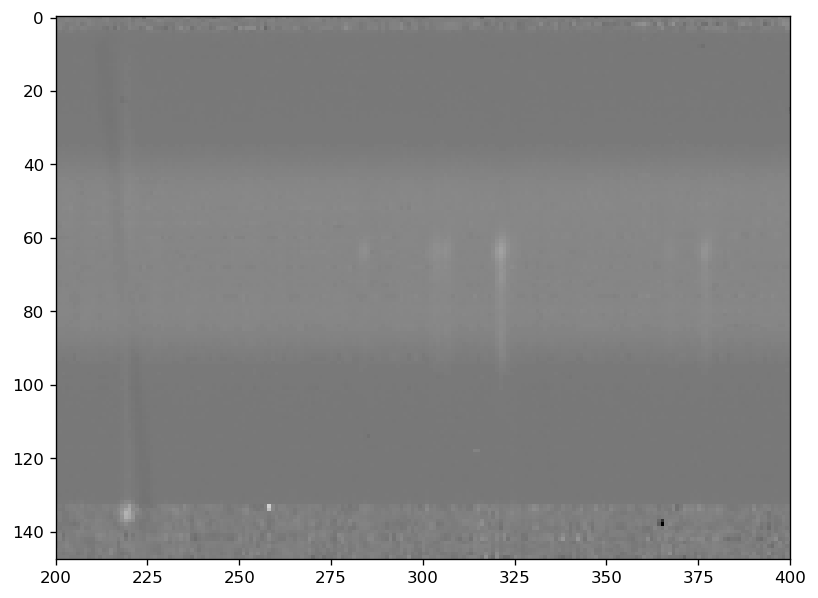

In [316]:
plt.figure(figsize=(12,6), dpi=120)
plt.imshow(sky_subtracted, cmap='gist_gray')
#plt.gca().invert_yaxis()
plt.xlim(200,400)
#plt.ylim(105,45)

(300.0, 325.0)

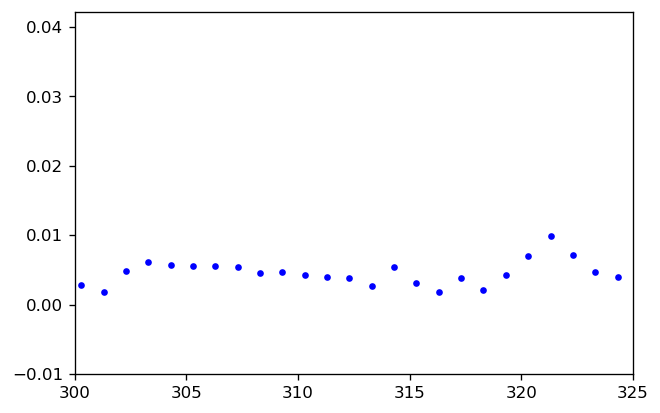

In [322]:
plt.figure(dpi=120)
plt.plot(pixel, selected_slit, '.b')
plt.xlim(300,325)

[[Model]]
    (Model(gaussian_fit, prefix='g1_') + Model(gaussian_fit, prefix='g2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 122
    # data points      = 1024
    # variables        = 12
    chi-square         = 0.00627226
    reduced chi-square = 6.1979e-06
    Akaike info crit   = -12267.1642
    Bayesian info crit = -12207.9865
##  Warning: uncertainties could not be estimated:
[[Variables]]
    g1_a0:  0.00271064 +/- 0.00221468 (81.70%) (init = 0.005)
    g1_a1:  73.3263666 +/- 1.01275167 (1.38%) (init = 74)
    g1_a2:  1.32323323 +/- 0.83464419 (63.08%) (init = 1)
    g1_a3: -51.0229984 +/-        nan (nan%) (init = 0.1)
    g1_a4:  0.02108298 +/- 3.65482696 (17335.44%) (init = 0)
    g1_a5: -7.1448e-05 +/- 0.00780890 (10929.43%) (init = 0)
    g2_a0:  0.00695400 +/- 0.00225709 (32.46%) (init = 0.008)
    g2_a1:  117.766991 +/- 0.38723665 (0.33%) (init = 117)
    g2_a2:  1.29022141 +/- 0.32359884 (25.08%) (init = 1)
    g2_a3:  51.0268679 +/- 

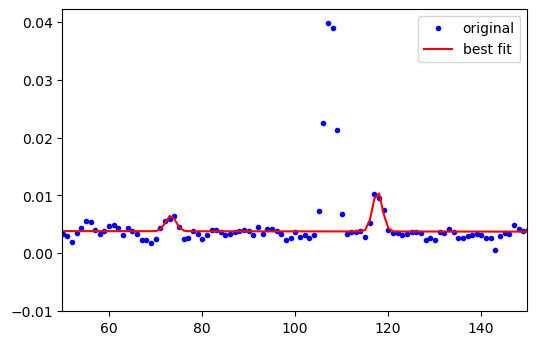

In [325]:
#gmodel = Model(gaussian_fit)
gmodel = Model(gaussian_fit, prefix='g1_') + Model(gaussian_fit, prefix='g2_')
#print('parameter names: {}'.format(gmodel.param_names))
#print('independent variables: {}'.format(gmodel.independent_vars))

#params = gmodel.make_params(a0=0.005, a1=74, a2=1, a3=0.1, a4=0, a5=0)
params = gmodel.make_params(g1_a0=0.005, g1_a1=74, g1_a2=1, g1_a3=0.1, g1_a4=0, g1_a5=0,
                            g2_a0=0.008, g2_a1=117, g2_a2=1, g2_a3=0.1, g2_a4=0, g2_a5=0, )
                            #g3_a0=)
result = gmodel.fit(selected_slit, params, x=pixel)

print(result.fit_report())

plt.figure(dpi=100)
plt.plot(x, y,'b.', label='original')
#plt.plot(x, result.init_fit, 'k--', label='initial fit')
plt.plot(x, result.best_fit, 'r-', label='best fit')
plt.xlim(50, 150)
plt.legend(loc='best')
plt.show()

In [293]:
gmodel = Model(gaussian_fit)

params = gmodel.make_params(a0=1, a1=107, a2=2, a3=0.1, a4=0, a5=0)

x = pixel

a0_all_slit = []
a1_all_slit = []
a2_all_slit = []
a3_all_slit = []
a4_all_slit = []
a5_all_slit = []

for i in range(60):
    y = sky_subtracted[i+40]
    all_slit_result = gmodel.fit(y, params, x=x)
    a0_all_slit.append(all_slit_result.best_values.get('a0'))
    a1_all_slit.append(all_slit_result.best_values.get('a1'))
    a2_all_slit.append(all_slit_result.best_values.get('a2'))
    a3_all_slit.append(all_slit_result.best_values.get('a3'))
    a4_all_slit.append(all_slit_result.best_values.get('a4'))
    a5_all_slit.append(all_slit_result.best_values.get('a5'))
a0_all_slit_array = np.array(a0_all_slit)
a1_all_slit_array = np.array(a1_all_slit)
a2_all_slit_array = np.array(a2_all_slit)
a3_all_slit_array = np.array(a3_all_slit)
a4_all_slit_array = np.array(a4_all_slit)
a5_all_slit_array = np.array(a5_all_slit)

pixel_all_slit = np.linspace(0, len(a0_all_slit_array), len(a0_all_slit_array))
#plt.figure(dpi=100)
#plt.plot(pixel_all_slit, a0_all_slit_array)
#plt.figure(dpi=100)
#plt.plot(pixel_all_slit, a1_all_slit_array)
#plt.figure(dpi=100)
#plt.plot(pixel_all_slit, a2_all_slit_array)
#plt.figure(dpi=100)
#plt.plot(pixel_all_slit, a3_all_slit_array)
#plt.figure(dpi=100)
#plt.plot(pixel_all_slit, a4_all_slit_array)
#plt.figure(dpi=100)
#plt.plot(pixel_all_slit, a5_all_slit_array)

# plot more slits
multi_slit = subtracted[45:80,]
multi_pixel = np.linspace(0, 1024, 1024*len(multi_slit))
flattened_slit = np.ravel(multi_slit.T)

plt.figure()
plt.plot(multi_pixel, flattened_slit, '.')

multi_index = np.where((multi_pixel>100)*(multi_pixel<113))

plt.figure()
plt.plot(multi_pixel[multi_index], flattened_slit[multi_index],'.')

for n in range(224): #We use this list to create a list which holds all the data from Order19
    num = n + 76
    if num < 100:
        image_filei = 'D:/Python work/Keck 05Sept06 Data/Keck 05Sept06 Data/05Sep06 Observations/uranus/order19/05sep06_00' + str(num) + '.fits'
        fits.open(image_filei)
        image_datai = fits.getdata(image_filei, ext=0)
        Keck_Data.append(image_datai)
    elif num < 192 and num >= 100:
        image_filei = 'D:/Python work/Keck 05Sept06 Data/Keck 05Sept06 Data/05Sep06 Observations/uranus/order19/05sep06_0' + str(num) + '.fits'
        fits.open(image_filei)
        image_datai = fits.getdata(image_filei, ext=0)
        Keck_Data.append(image_datai)
    elif num >= 192 and num < 196:
        print('Star files')
    elif num >= 196 and num < 296:
        image_filei = 'D:/Python work/Keck 05Sept06 Data/Keck 05Sept06 Data/05Sep06 Observations/uranus/order19/05sep06_0' + str(num) + '.fits'
        fits.open(image_filei)
        image_datai = fits.getdata(image_filei, ext=0)
        Keck_Data.append(image_datai)
    else:
        print('Galaxy files')

notebook_path = os.path.abspath('h3p.ipynb')
filepath = os.path.join(os.path.dirname(notebook_path), '02jun17/spec/order36/')


hdu_list1 = fits.open(filepath + 'jun02s0043_order36.fits', ignore_missing_end=True)
hdu_list2 = fits.open(filepath + 'jun02s0044_order36.fits', ignore_missing_end=True)
hdu_list3 = fits.open(filepath + 'jun02s0045_order36.fits', ignore_missing_end=True)
hdu_list4 = fits.open(filepath + 'jun02s0046_order36.fits', ignore_missing_end=True)

hdu_list5 = fits.open(filepath + 'jun02s0047_order36.fits', ignore_missing_end=True)
hdu_list6 = fits.open(filepath + 'jun02s0048_order36.fits', ignore_missing_end=True)
hdu_list7 = fits.open(filepath + 'jun02s0049_order36.fits', ignore_missing_end=True)
hdu_list8 = fits.open(filepath + 'jun02s0050_order36.fits', ignore_missing_end=True)


data1 = hdu_list1[0].data
data2 = hdu_list2[0].data
data3 = hdu_list3[0].data
data4 = hdu_list4[0].data

data5 = hdu_list5[0].data
data6 = hdu_list6[0].data
data7 = hdu_list7[0].data
data8 = hdu_list8[0].data

sum_A = data1 + data4 + data5 + data8
sum_B = data2 + data3 + data6 + data7

plt.figure(figsize=(8,8))
plt.imshow(sum_B - sum_A)
plt.colorbar()

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.figure(figsize=(10,8))
ax = plt.gca()
im = ax.imshow(data53 - data51)

#### create an axes on the right side of ax. The width of cax will be 5%
#### of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)